<a href="https://colab.research.google.com/github/ehpub/kfq_ML_2023/blob/main/2023_kfq_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

강의 교재 : https://wikibook.co.kr/pymlrev2/

In [1]:
def distance(x1,x2):
  return sum((x1-x2)**2)**(1/2)

In [2]:
import numpy as np

In [3]:
na1 = np.array([1,2])
na2 = np.array([5,5])
print(distance(na1,na2))

5.0


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [67]:
def kmeans(data,k=3):
  #초기에 k개의 중심점을 구하라
  cis = np.random.choice(range(len(data)),k)
  centers = np.array( [data[ci]    for ci in cis])

  cs = {} #클러스터 사전
  #반복
  while True:
    cs = {} #클러스터 사전
    #모든 데이터를 k개의 중심점에서 거리를 계산한다.
    for d in data:
      dis = np.array([distance(d,center) for center in centers])
      ai = np.argmin(dis) #최소 거리의 인덱스

      #가장 가까운 중심점에 속한 그룹에 속하게 한다.
      if ai not in cs: #존재하지 않는 그룹일 때
        cs[ai]=[] #새로운 그룹을 사전에 생성하여 보관
      cs[ai].append(d) #해당 그룹에 데이터를 속하게 한다.

    #새로운 중심점을 계산한다.
    ncenters=[]
    for i in range(k):
      xdata = np.array([x for x,_ in cs[i]])
      ydata = np.array([y for _,y in cs[i]])
      ncenters.append([xdata.mean(), ydata.mean()])

    #조건(기존 중심점과 새로운 중심점이 같으면)
    if np.array_equal(centers,ncenters):
      break#반복문을 탈출하시오.
    centers = ncenters
  return cs

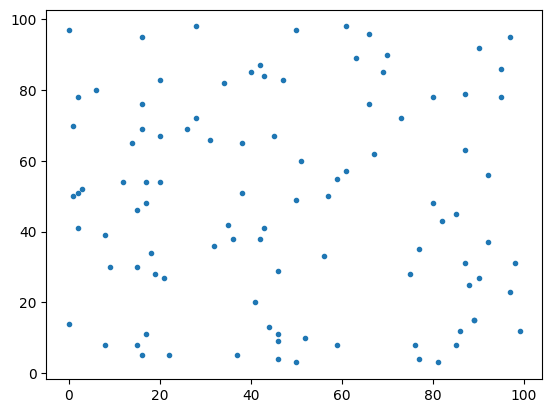

In [68]:
n = 100

data = np.array([[np.random.randint(0,100),
                 np.random.randint(0,100)]
                for _ in range(n)])

plt.plot(data[:,0],data[:,1],'.')
plt.show()

In [69]:
cs = kmeans(data)
len(cs[0]),len(cs[1]),len(cs[2])

(28, 42, 30)

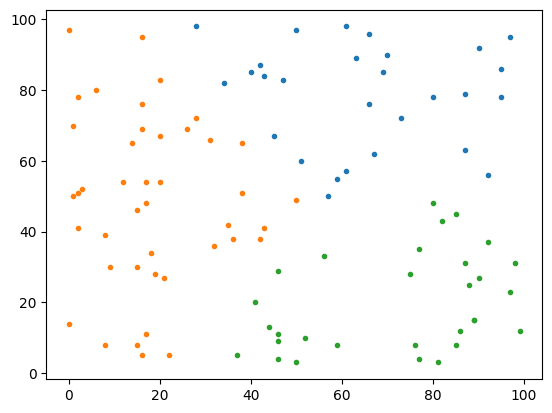

In [71]:
for i in range(3):
  xd = [arr[0] for arr in cs[i]]
  yd = [arr[1] for arr in cs[i]]
  plt.plot(xd,yd,'.')
plt.show()

In [74]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [76]:
iris = load_iris()
data = iris.data
label = iris.target

In [77]:
model = KMeans(n_clusters=3)
model.fit(data)
print(model.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [80]:
np.unique(model.labels_,return_counts=True)

(array([0, 1, 2], dtype=int32), array([38, 50, 62]))

In [82]:
df = pd.DataFrame()
df['target'] = label
df['label'] = model.labels_

In [83]:
df.groupby(['target','label'])['label'].count()

target  label
0       1        50
1       0         2
        2        48
2       0        36
        2        14
Name: label, dtype: int64

In [84]:
from sklearn.datasets import make_blobs

In [108]:
data,label = make_blobs(n_samples=200,
                        n_features=2,
                        centers=3,
                        cluster_std=0.8
                        )

In [109]:
data.shape,label.shape

((200, 2), (200,))

In [110]:
np.unique(label,return_counts=True)

(array([0, 1, 2]), array([67, 67, 66]))

In [111]:
df = pd.DataFrame(data,columns=['f1','f2'])
df['target']=label

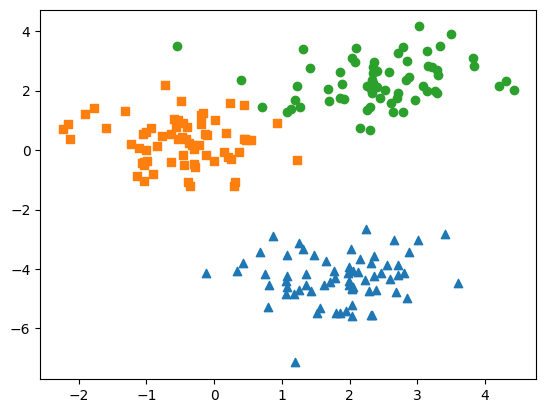

In [112]:
markers =['^','s','o']
for i,marker in enumerate(markers):
  f_i = df['target']==i
  df_i = df[f_i]
  plt.scatter(df_i['f1'],df_i['f2'],marker=marker)
plt.show()

In [ ]:
model = KMeans(n_clusters=3)
model.fit(data)
print(model.labels_)
print(label)

In [ ]:
df = pd.DataFrame(data,columns=['f1','f2'])
df['target'] = label
df['label'] = model.labels_
df.groupby(['target','label'])['label'].count()

In [ ]:
print(model.cluster_centers_)

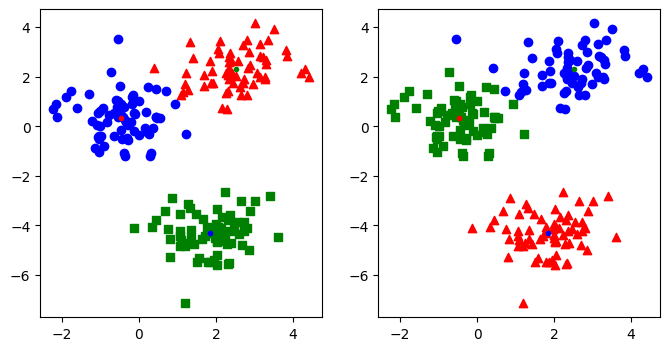

In [124]:
markers =['^','s','o']
colors = ['r','g','b']
c_colors = ['g','b','r']
_,axes = plt.subplots(ncols=2,figsize=(8,4))
for i,marker in enumerate(markers):
  f_i = df['label']==i
  df_i = df[f_i]
  axes[0].scatter(df_i['f1'],df_i['f2'],marker=marker,color=colors[i])
  center = model.cluster_centers_[i]
  axes[0].plot(center[0],center[1],color=c_colors[i],marker='.')

  f_i = df['target']==i
  df_i = df[f_i]
  axes[1].scatter(df_i['f1'],df_i['f2'],marker=marker,color=colors[i])
  center = model.cluster_centers_[i]
  axes[1].plot(center[0],center[1],color=c_colors[i],marker='.')


plt.show()

In [126]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [132]:
data = iris.data
label = iris.target
ss = silhouette_samples(data,label)
ss.mean()

0.5034774406932961

In [133]:
model = KMeans(n_clusters=3)
model.fit(data)
ss2 = silhouette_samples(data,model.labels_)
ss2.mean()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5528190123564095

In [139]:
df = pd.DataFrame(data,columns=iris.feature_names)
df['target'] = label
df['label'] = model.labels_
df['ss_t'] = ss
df['ss_l'] = ss2

In [140]:
df.groupby('label')['ss_l'].mean()

label
0    0.417320
1    0.798140
2    0.451105
Name: ss_l, dtype: float64

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5662344175321901
For n_clusters = 6 The average silhouette_score is : 0.4358297989156284


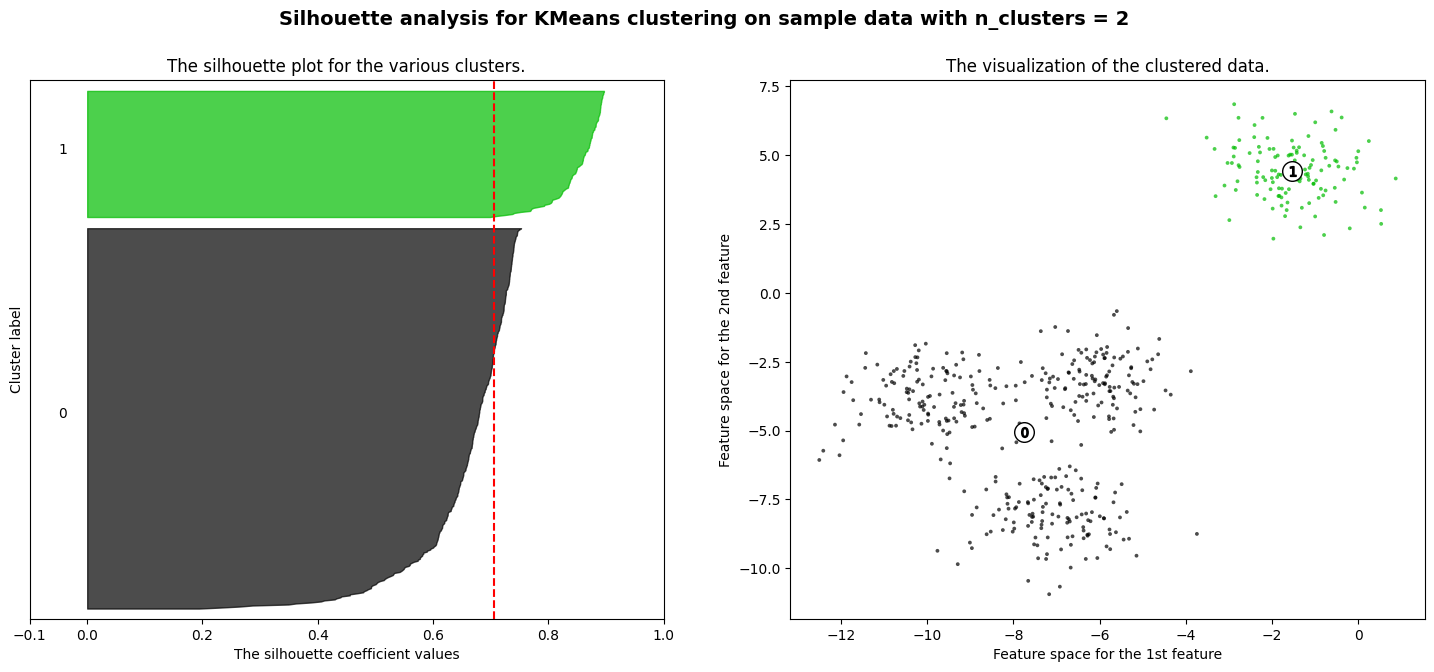

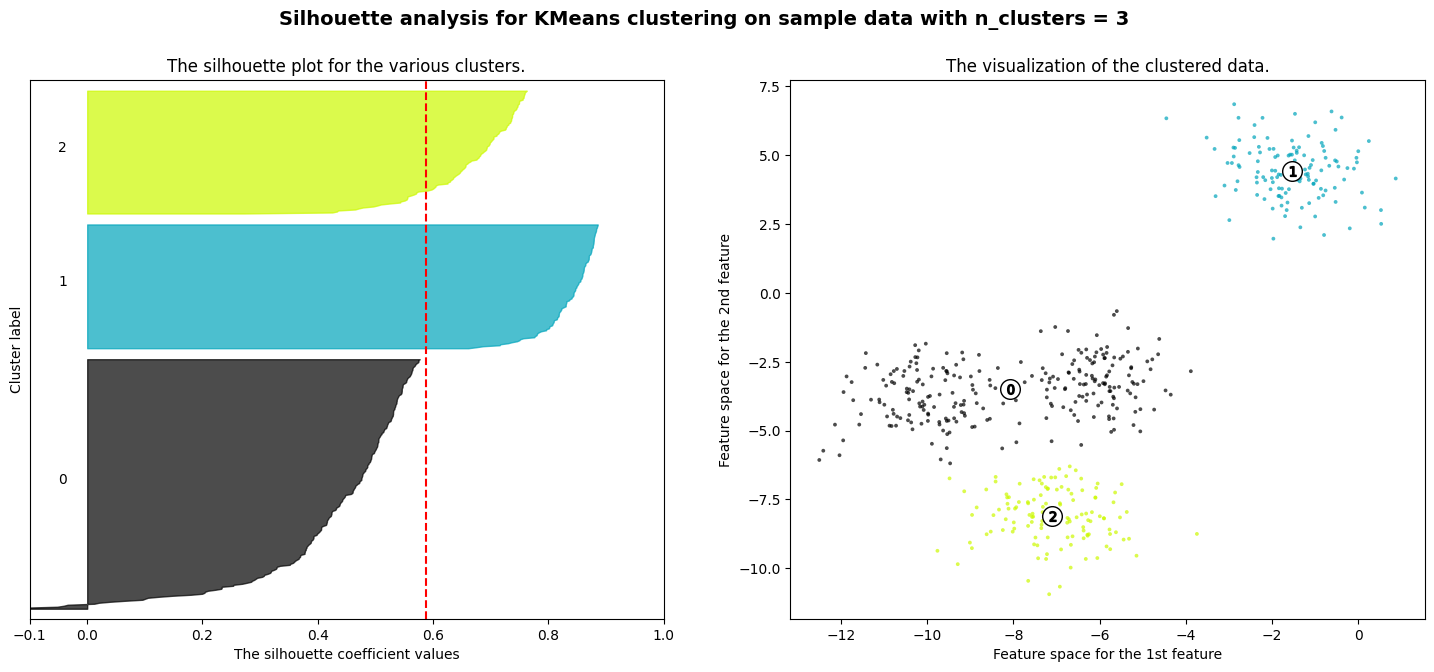

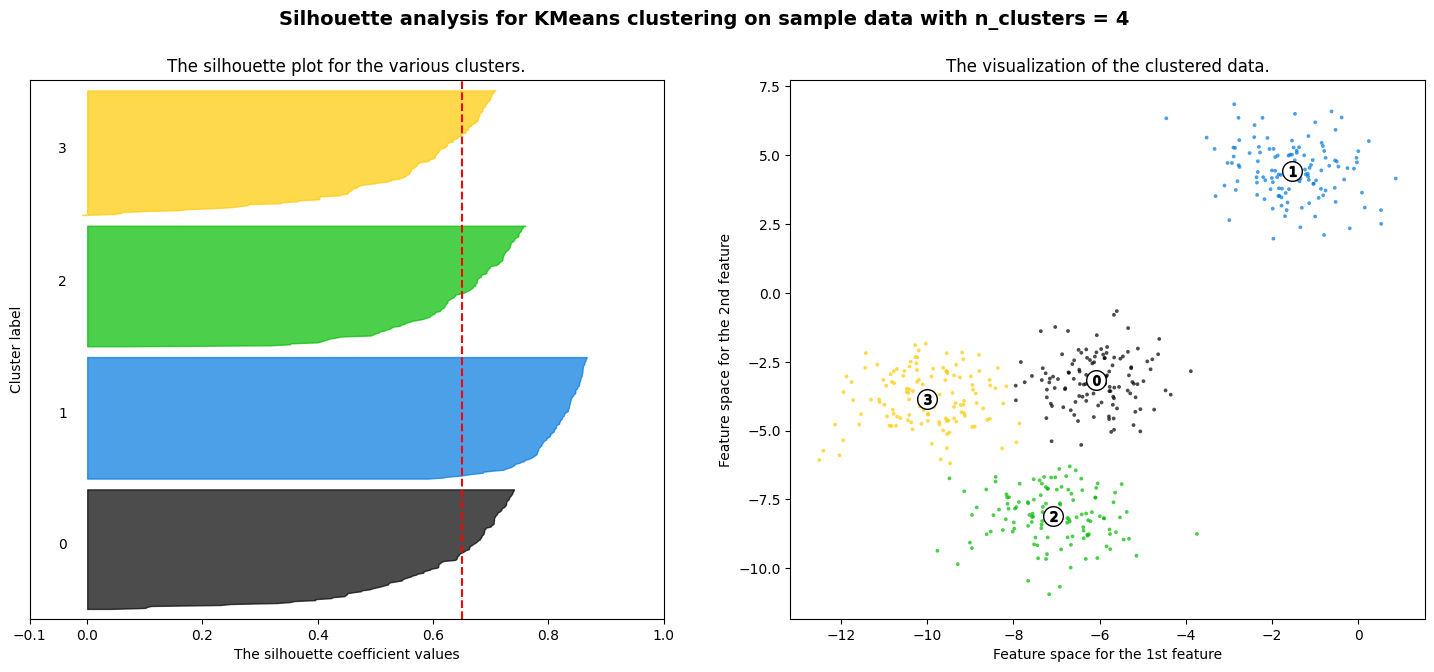

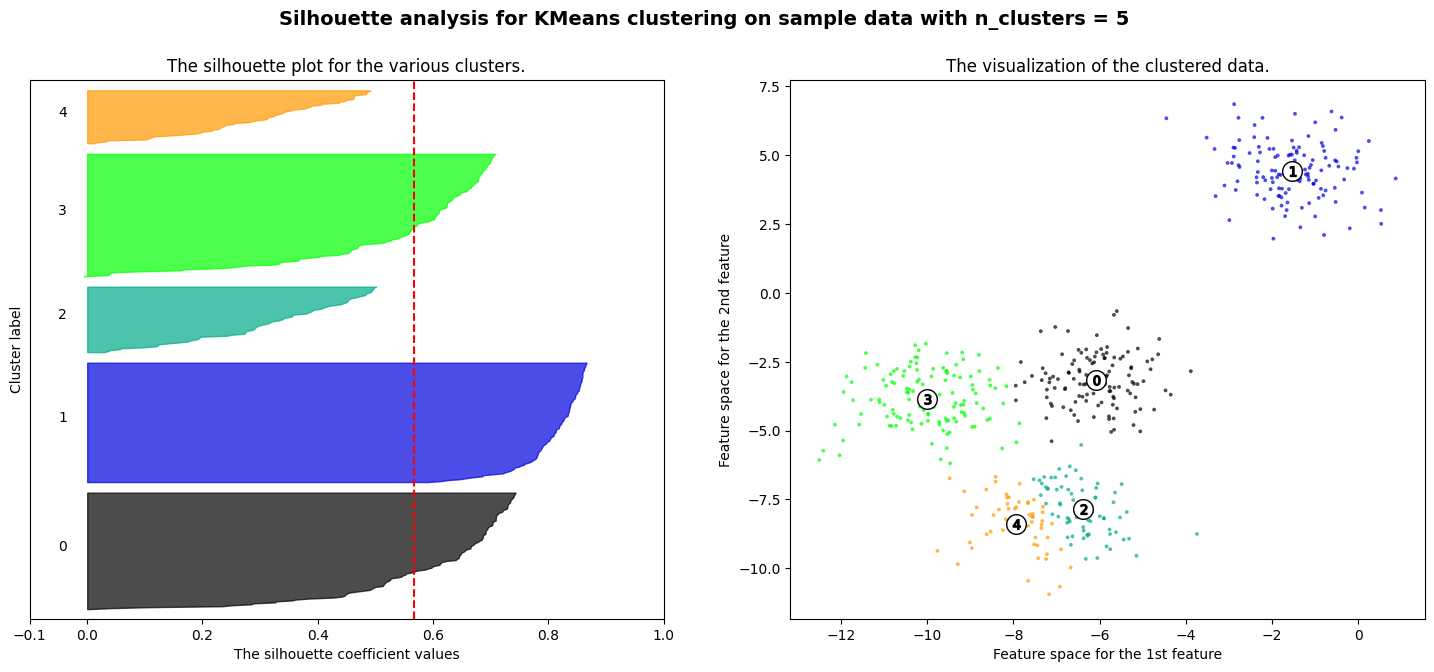

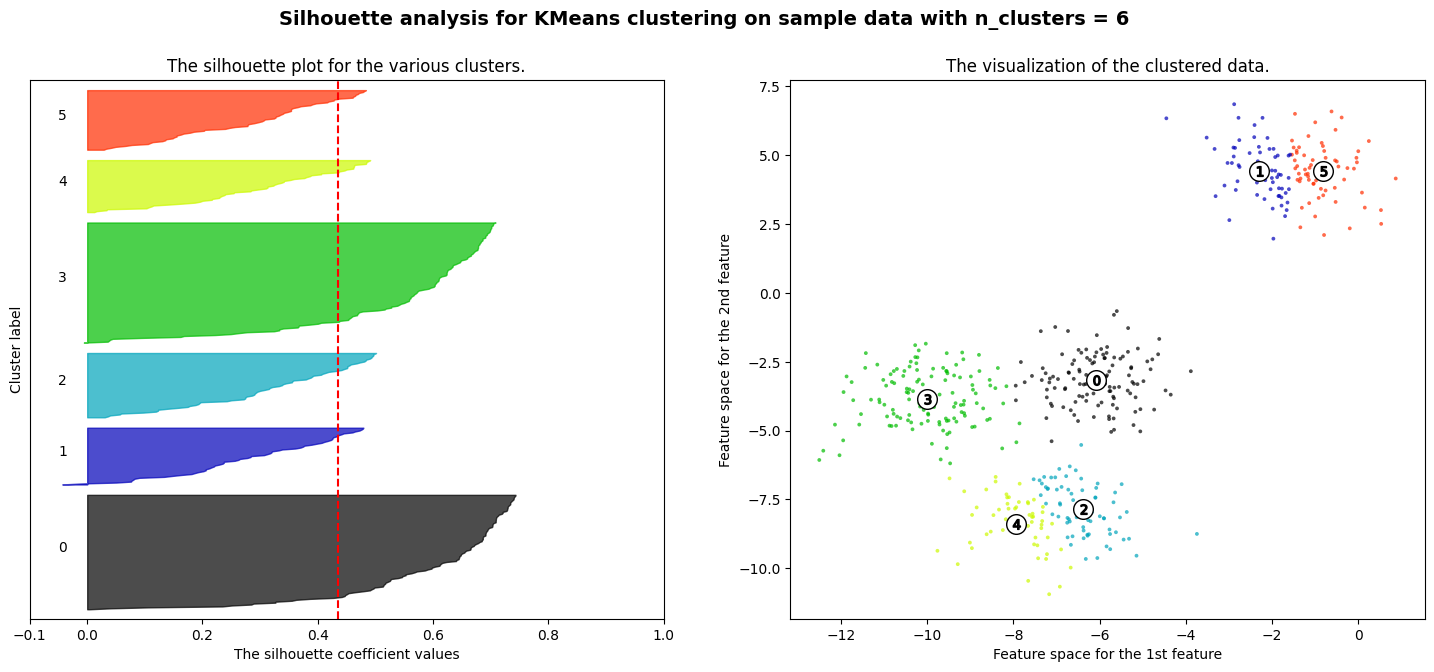

In [141]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()